In [3]:
import numpy as np

cs_weight = np.load("/DATA_EDS/chenht/datasets/CityScapes/class_weights.npy")
carla_weight = np.load("/DATA_EDS/chenht/datasets/Carla2CityscapesV2/class_weights.npy")
print(cs_weight)
print(carla_weight)

[ 0.14275024  0.8649417   0.23059703  8.03046867  5.99946218  4.28825869
 25.32863015  9.54732956  0.33042081  4.54575523  1.30957476  4.31775402
 38.95117158  0.75246611 19.6786128  22.37817017 22.59794285 53.3475464
 12.71580277]
[1.47922655e-01 7.27148997e-01 1.49345241e-01 6.60281202e+01
 2.11242880e+01 4.67569918e+00 3.10048378e+01 2.67523590e+01
 7.34283250e-01 4.28367920e+01 5.56952859e-01 1.67176927e+01
 2.01617112e+02 2.21891374e+00 1.53678173e+01 1.81375133e+01
 9.98888193e+08 2.31770335e+02 5.19604761e+02]


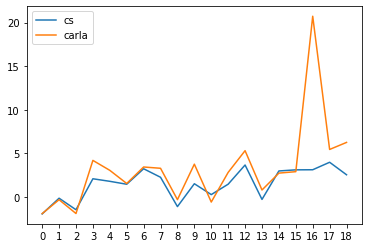

In [11]:
import matplotlib.pyplot as plt
x = np.arange(0, 19, 1)

plt.plot(x, np.log(cs_weight), label="cs")
plt.plot(x, np.log(carla_weight), label="carla")
plt.xticks(x.astype('uint8'))
plt.legend()
plt.show()

In [31]:
import numpy as np
import os
from PIL import Image
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm



[]

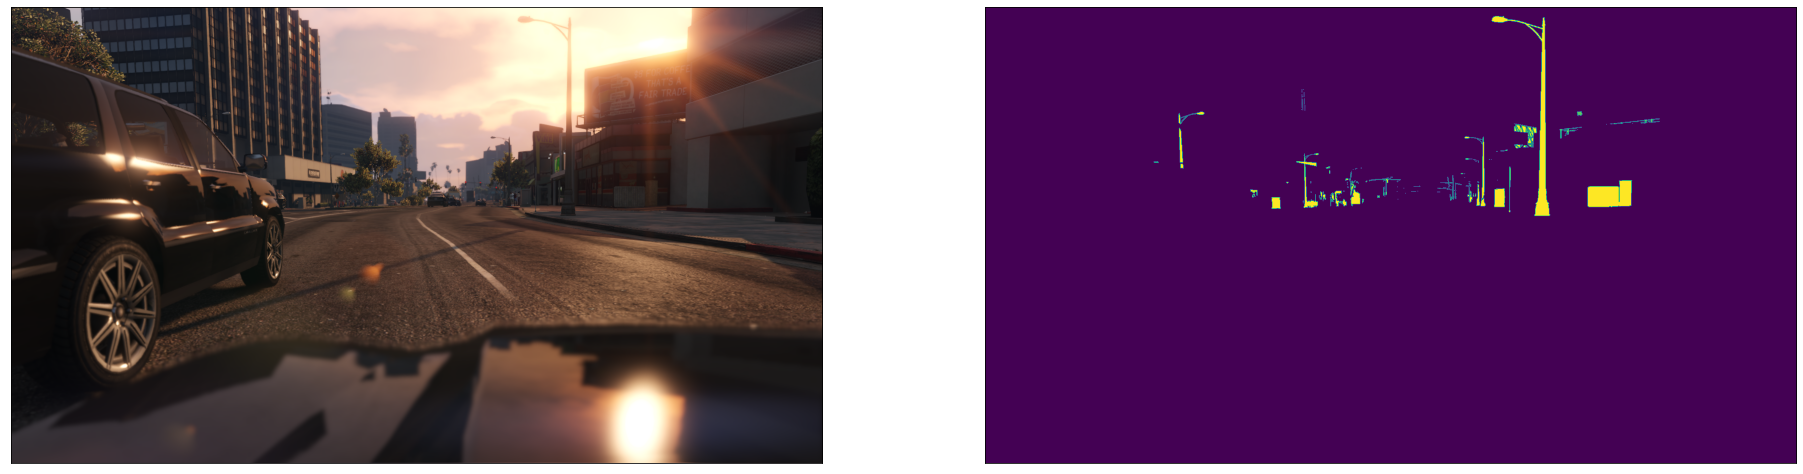

In [26]:
im = Image.open("/DATA_EDS/chenht/datasets/P4B/train/cls/018/018_00010.png")
a = np.array(im)
a[a != 10] = 0
a[a == 10] = 255

b = np.array(Image.open("/DATA_EDS/chenht/datasets/P4B/train/img/018/018_00010.png"))
fig, axs = plt.subplots(1, 2, figsize=(32, 64))
axs[0].imshow(b)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(a)
axs[1].set_xticks([])
axs[1].set_yticks([])


In [37]:
from collections import namedtuple

CityscapesClass = namedtuple('CityscapesClass', ['name', 'id', 'train_id', 'category', 'category_id',
                                                     'has_instances', 'ignore_in_eval', 'color'])

def get_file_paths(directory):  # helper function to get absolute paths for all files within a directory
        file_paths = []
        for dirpath, folders, filenames in os.walk(directory):
            for f in filenames:
                file_paths.append(os.path.abspath(os.path.join(dirpath, f)))
        return file_paths

classes = [
    CityscapesClass('unlabeled',      0,  255, 'void',         0, False, True,  (0, 0, 0)),
    CityscapesClass('ambiguous',      1,  255, 'void',         0, False, True,  (111, 74, 0)),
    CityscapesClass('sky',            2,  10, 'void',         0, False, True,  (70, 130, 180)),
    CityscapesClass('road',           3,  0, 'void',         0, False, True,  (128, 64, 128)),
    CityscapesClass('sidewalk',       4,  1, 'void',         0, False, True,  (0, 0, 0)),
    CityscapesClass('rail track',     5,  255, 'void',         0, False, True,  (111, 74, 0)),
    CityscapesClass('terrain',        6,  9,  'void',         0, False, True,  (81, 0, 81)),
    CityscapesClass('tree',           7,  8,   'flat',         1, False, False, (128, 64, 128)),
    CityscapesClass('vegetation',     8,  8,   'flat',         1, False, False, (244, 35, 232)),
    CityscapesClass('building',       9,  2, 'flat',         1, False, True,  (250, 170, 160)),
    CityscapesClass('infrastructure', 10, 5,  'flat',         1, False, True,  (230, 150, 140)),
    CityscapesClass('fence',          11, 4,   'construction', 2, False, False, (70, 70, 70)),
    CityscapesClass('billboard',      12, 255,   'construction', 2, False, False, (102, 102, 156)),
    CityscapesClass('traffic light',  13, 6,   'construction', 2, False, False, (190, 153, 153)),
    CityscapesClass('traffic sign',   14, 7,  'construction', 2, False, True,  (180, 165, 180)),
    CityscapesClass('mobile barrier', 15, 255,  'construction', 2, False, True,  (150, 100, 100)),
    CityscapesClass('fire hydrant',   16, 255, 'construction', 2, False, True,  (150, 120, 90)),
    CityscapesClass('chair',          17, 255,   'object',       3, False, False, (153, 153, 153)),
    CityscapesClass('trash',          18, 255, 'object',       3, False, True,  (153, 153, 153)),
    CityscapesClass('trash can',      19, 255,  'object',       3, False, False, (250, 170, 30)),
    CityscapesClass('person',         20, 11,   'object',       3, False, False, (220, 220, 0)),
    CityscapesClass('animal',         21, 255,   'nature',       4, False, False, (107, 142, 35)),
    CityscapesClass('bicycle',        22, 18,  'nature',       4, False, False, (152, 251, 152)),
    CityscapesClass('motrocycle',     23, 17,  'sky',          5, False, False, (70, 130, 180)),
    CityscapesClass('car',            24, 13,   'human',        6, True,  False, (220, 20, 60)),
    CityscapesClass('van',            25, 13,   'human',        6, True,  False, (255, 0, 0)),
    CityscapesClass('bus',            26, 15,   'vehicle',      7, True,  False, (0, 0, 142)),
    CityscapesClass('truck',          27, 14,   'vehicle',      7, True,  False, (0, 0, 70)),
    CityscapesClass('trailer',        28, 255,   'vehicle',      7, True,  False, (0, 60, 100)),
    CityscapesClass('train',          29, 16,   'vehicle',      7, True,  True,  (0, 0, 90)),
    CityscapesClass('plane',          30, 255,   'vehicle',      7, True,  True,  (0, 0, 110)),
    CityscapesClass('boat',           31, 255,   'vehicle',      7, True,  False, (0, 80, 100)),
]

id_to_train_id = np.array([c.train_id for c in classes])
targets_list = get_file_paths("/DATA_EDS/chenht/datasets/P4B/train/cls")
images_containing_class = {i:[] for i in range(19)}
class_in_image = {}
for target in tqdm(targets_list):
    array = np.array(Image.open(target))
    encoded_array = id_to_train_id[array]
    classes, counts = np.unique(encoded_array, return_counts=True)
    class_in_image[target] = list(classes.astype("uint8"))
    for _class in classes:
        if _class != 255:
            images_containing_class[_class].append(target)


100%|██████████| 13367/13367 [11:41<00:00, 19.05it/s]


In [55]:
for i in range(19):
    print(f"{i}: {len(images_containing_class[i])}")
# import json

# for target in tqdm(class_in_image):
#     class_in_image[target] = list(map(lambda x: int(x), class_in_image[target]))

# with open("/DATA_EDS/chenht/datasets/P4B/images_containing_class.json", "w") as f:
#     json.dump(images_containing_class, f)
    
with open("/DATA_EDS/chenht/datasets/P4B/classes_in_image.json", "w") as f:
    json.dump(class_in_image, f)



0: 13156
1: 11948
2: 13061
3: 0
4: 9355
5: 13321
6: 7868
7: 7117
8: 13235
9: 13095
10: 13198
11: 12572
12: 0
13: 12544
14: 6738
15: 2221
16: 268
17: 2266
18: 268
